In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
from google.colab import files
uploaded = files.upload()



Saving telco.csv to telco.csv


In [6]:
import pandas as pd

df = pd.read_csv("telco.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.drop("customerID", axis=1, inplace=True)

df.replace({"Yes":1, "No":0}, inplace=True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.fillna(df.mean(numeric_only=True), inplace=True)

df.head()


/tmp/ipython-input-368267644.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes":1, "No":0}, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


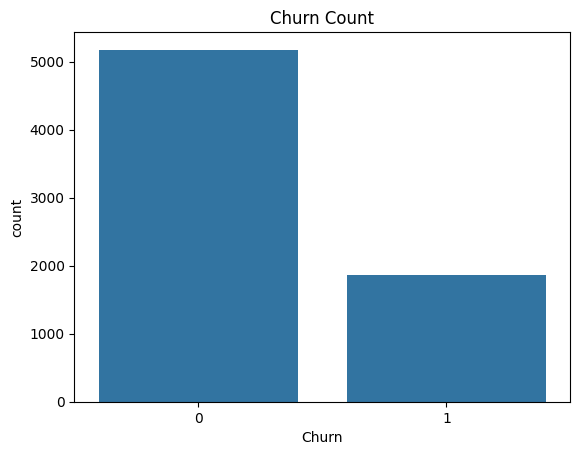

,count
Churn,
0,5174
1,1869


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Churn", data=df)
plt.title("Churn Count")
plt.show()

df["Churn"].value_counts()


In [9]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X = pd.get_dummies(X)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create model
model1 = LogisticRegression(max_iter=5000)


# train model
model1.fit(X_train, y_train)

# predict on test data
pred1 = model1.predict(X_test)

# accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred1))

# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, pred1))

# full report
print(classification_report(y_test, pred1))


Logistic Regression Accuracy: 0.8204400283889283
Confusion Matrix:
 [[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [12]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))


Random Forest Accuracy: 0.7927608232789212
[[939  97]
 [195 178]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter=5000)
model_lr.fit(X_train_scaled, y_train)

pred_lr = model_lr.predict(X_test_scaled)

print("Improved Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Improved Logistic Regression Accuracy: 0.8204400283889283
[[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [15]:
!pip install xgboost


In [16]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5)
model_xgb.fit(X_train, y_train)

pred_xgb = model_xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


XGBoost Accuracy: 0.8062455642299503
[[931 105]
 [168 205]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter=5000)

model_lr.fit(X_train_scaled, y_train)

pred_lr = model_lr.predict(X_test_scaled)

print("Improved Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Improved Logistic Regression Accuracy: 0.8204400283889283
[[934 102]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [19]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

model_xgb.fit(X_train, y_train)

pred_xgb = model_xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgb))
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


XGBoost Accuracy: 0.8062455642299503
[[931 105]
 [168 205]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model_lr_bal = LogisticRegression(max_iter=5000, class_weight='balanced')
model_lr_bal.fit(X_train_scaled, y_train)

pred_bal = model_lr_bal.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_bal))
print(confusion_matrix(y_test, pred_bal))
print(classification_report(y_test, pred_bal))


Accuracy: 0.7473385379701917
[[746 290]
 [ 66 307]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



### Final Results

This project predicts customer churn using the Telco Customer Churn dataset.

Three models were trained and compared:
- Logistic Regression: 82%
- Random Forest: 79%
- XGBoost: 81%

Logistic Regression achieved the highest accuracy and is selected as the final model.
